## Problem Statement:

#### X Education wants help in selecting the most promising leads, build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# EDA and data cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',200)

In [2]:
# load the dataset from local storage
leads=pd.read_csv('C:\\Users\\91882\\Desktop\\Python\\Lead Scoring Assignment\\Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Understanding the basic ground information of my data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    #info
    print("\nInformation:")
    print(df.info())    
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())
    
    # Unique Value Inspection
    print("\nMissing Values:")
    print(df.nunique())

all_about_my_data(leads)

Here is some Basic Ground Info about your Data:

Number of Instances: 9240
Number of Features: 37

Summary Stats:
         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.3062

In [5]:
leads_backup=leads.copy()

In [6]:
# because select is just a default value, replacing all the selects with NaN.

leads.replace(to_replace="Select",value=np.nan,inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads.loc[round(leads.isnull().sum(axis=1)/len(leads.columns)*100,2)>50,:]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# according to data dictonary columns ['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index',
# 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
# 'Asymmetrique Profile Score'] are recorded by Sales person based on intusion
# can't keep variables based on intution so dropping these
leads=leads.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],axis=1)

In [10]:
# just to be sure checking null values
round((leads.isnull().sum()/leads.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# dropping variables with greater than 45% null values
leads=leads.drop(leads.loc[:,list(round((leads.isnull().sum()/leads.shape[0])*100,2)>=45)].columns,1)

In [12]:
# null values percentage check
round((leads.isnull().sum()/leads.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Checking unique counts in columns wise
leads.nunique().sort_values()

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Search                                              2
A free copy of Mastering The Interview              2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
X Education Forums                                  2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Newspaper Article                                   2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
City                        

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


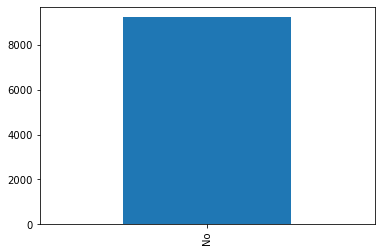

In [14]:
#checking the unique counts of individual columns with 1 unique values or more

print(round(leads['Receive More Updates About Our Courses'].value_counts()/leads.shape[0]*100,2))
leads['Receive More Updates About Our Courses'].value_counts().plot.bar()
plt.show()

# all of people do not want to Receive More Updates About Our Courses

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


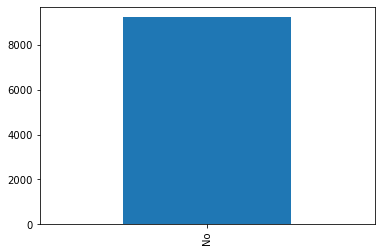

In [15]:
print(round(leads['I agree to pay the amount through cheque'].value_counts()/leads.shape[0]*100,2))
leads['I agree to pay the amount through cheque'].value_counts().plot.bar()
plt.show()
# all of the people did'nt see the ad in search

No    100.0
Name: Magazine, dtype: float64


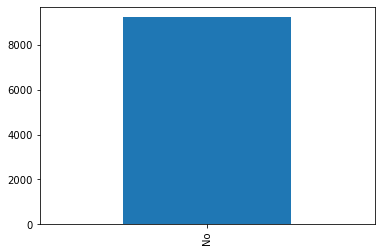

In [16]:
print(round(leads.Magazine.value_counts()/leads.shape[0]*100,2))
leads.Magazine.value_counts().plot.bar()
plt.show()
# all of the people did'nt see the ad in Magazine

No    100.0
Name: Get updates on DM Content, dtype: float64


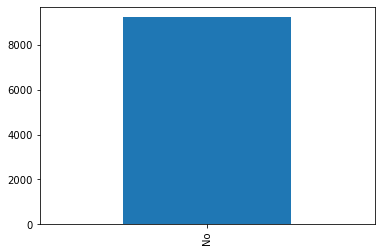

In [17]:
print(round(leads['Get updates on DM Content'].value_counts()/leads.shape[0]*100,2))
leads['Get updates on DM Content'].value_counts().plot.bar()
plt.show()
# all of the people did'nt see the ad in "Get updates on DM Content"

No    100.0
Name: Update me on Supply Chain Content, dtype: float64


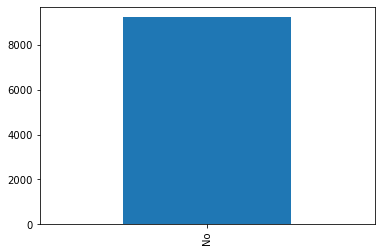

In [18]:
print(round(leads['Update me on Supply Chain Content'].value_counts()/leads.shape[0]*100,2))
leads['Update me on Supply Chain Content'].value_counts().plot.bar()
plt.show()
# all of the people did'nt see the ad in "Update me on supply chain content"

No     99.85
Yes     0.15
Name: Search, dtype: float64


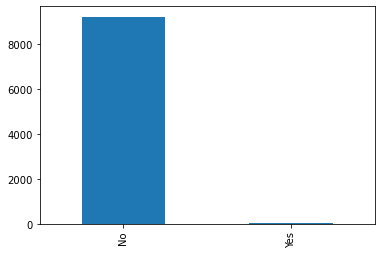

In [19]:
#checking the unique counts of individual columns with 2 unique values or more
print(round(leads.Search.value_counts()/leads.shape[0]*100,2))
leads.Search.value_counts().plot.bar()
plt.show()
# 99.85% of the people did'nt see the ad in search

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64


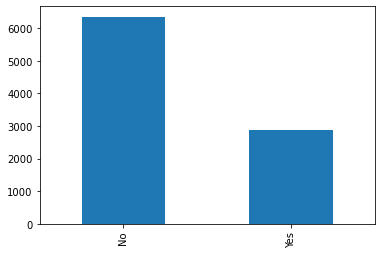

In [20]:
print(round(leads['A free copy of Mastering The Interview'].value_counts()/leads.shape[0]*100,2))
leads['A free copy of Mastering The Interview'].value_counts().plot.bar()
plt.show()
#about 30% of people wants free copy of Mastering The Interview

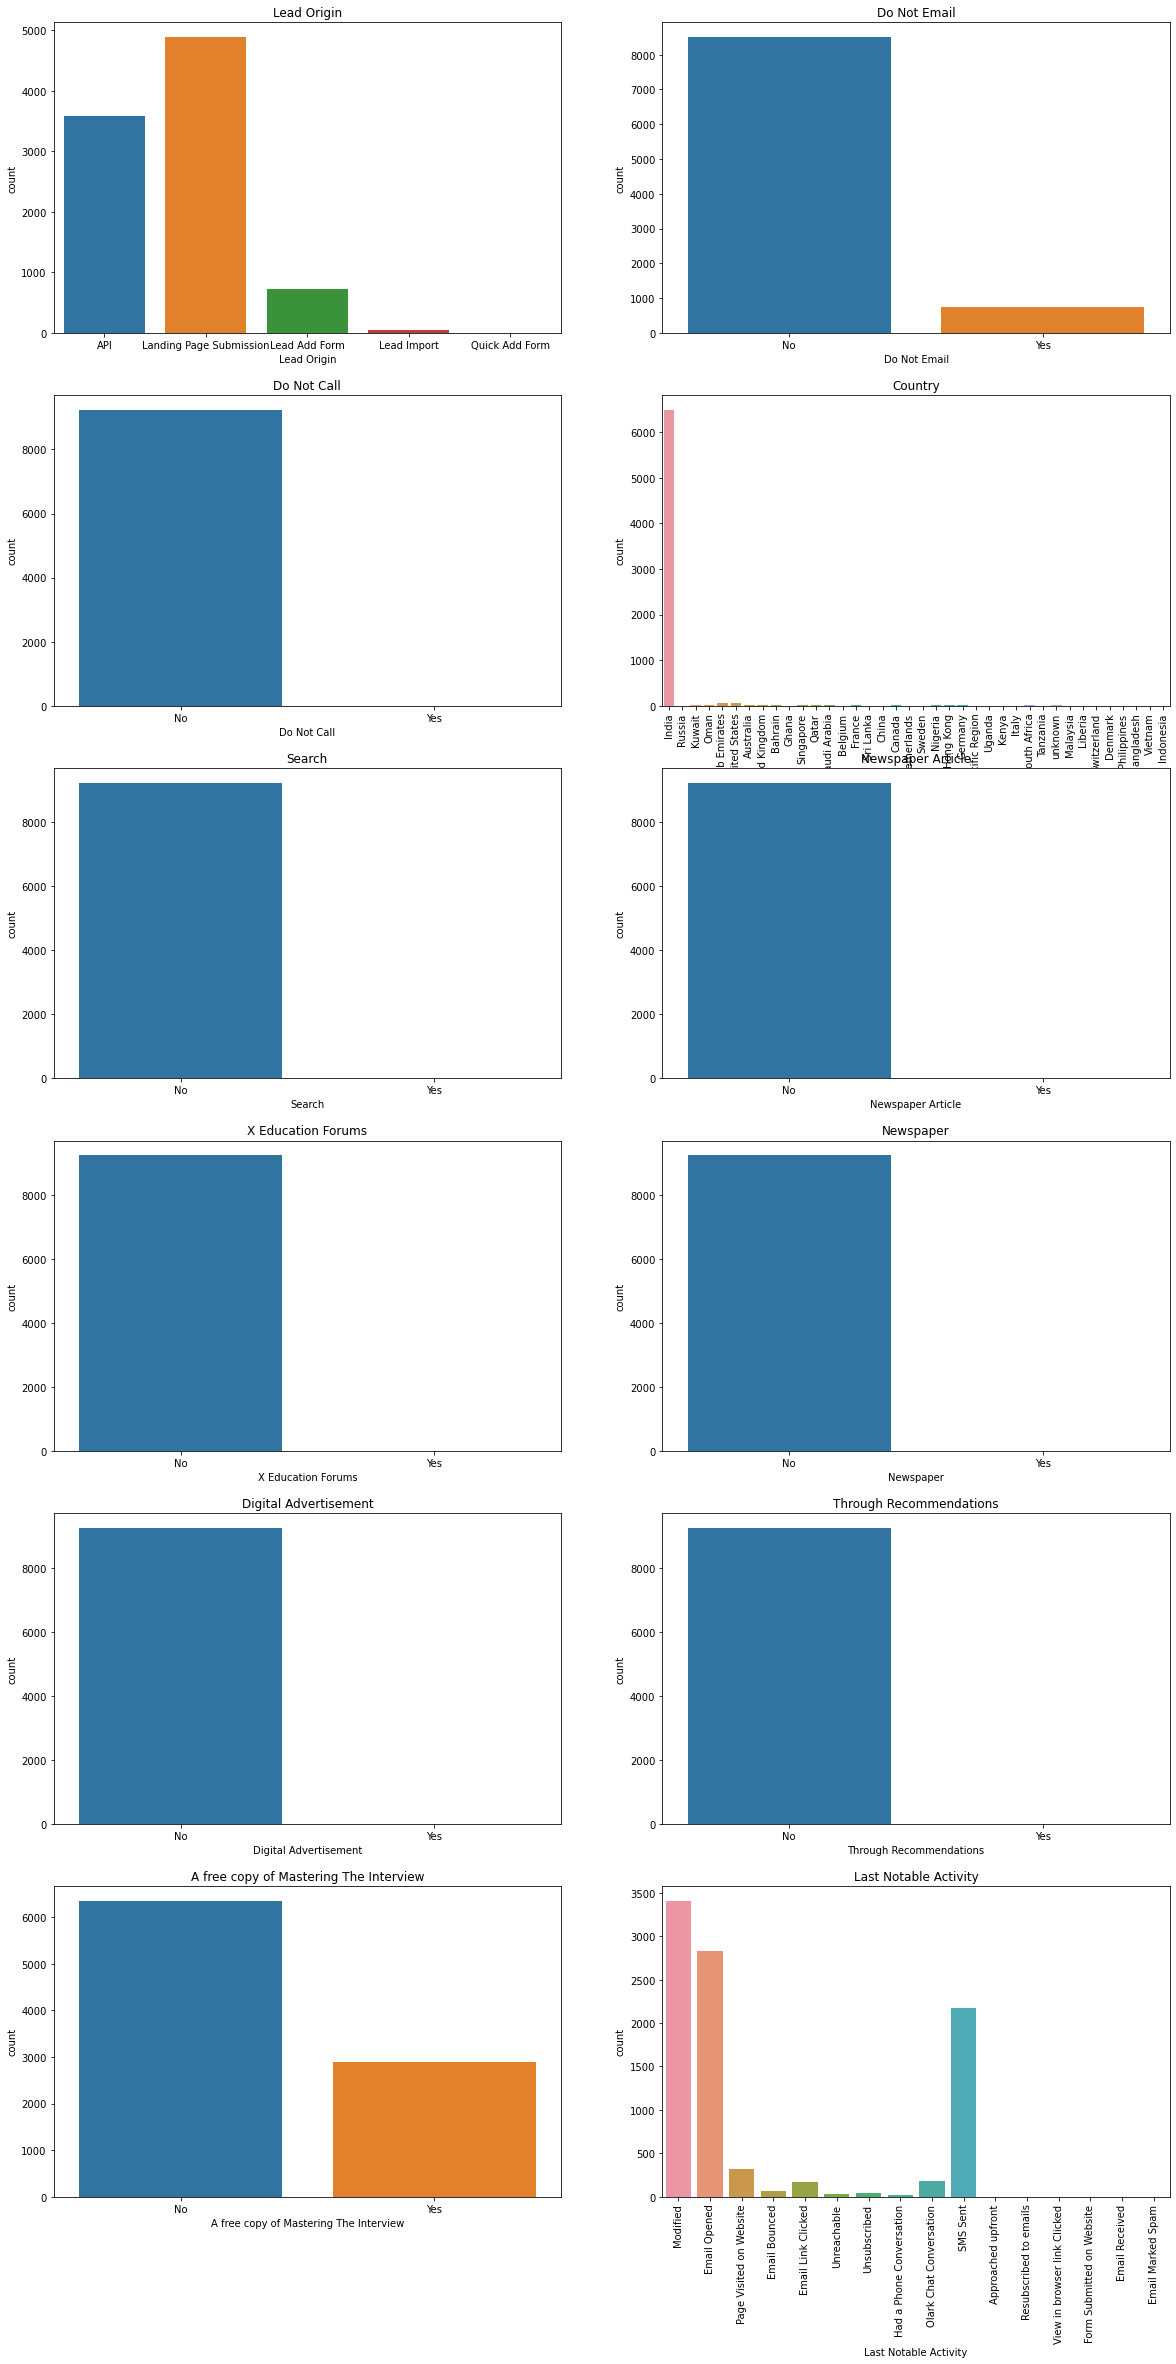

In [21]:
# Visualising each vraible for unique values
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


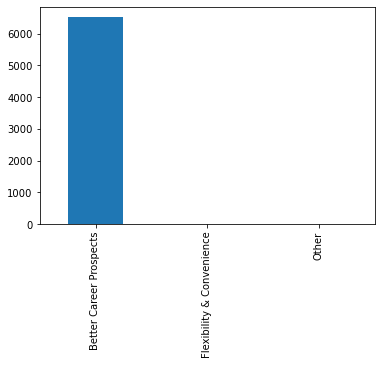

In [22]:
# getting the counts of columns with greater than 2 unique values
print(round(leads['What matters most to you in choosing a course'].value_counts()/leads.shape[0]*100,2))
print(leads['What matters most to you in choosing a course'].value_counts())
leads['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()
# 70.65 % people says better Career prospects matter most to them while choosing a course

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64


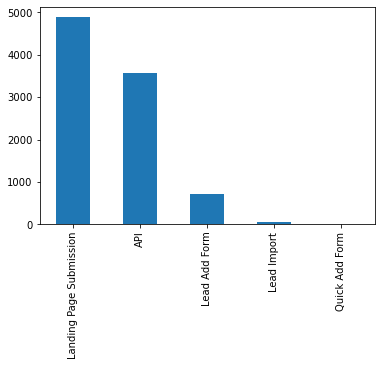

In [23]:
print(round(leads['Lead Origin'].value_counts()/leads.shape[0]*100,2))
leads['Lead Origin'].value_counts().plot.bar()
plt.show()
# majority of leads comes from Landing page submission and API

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64


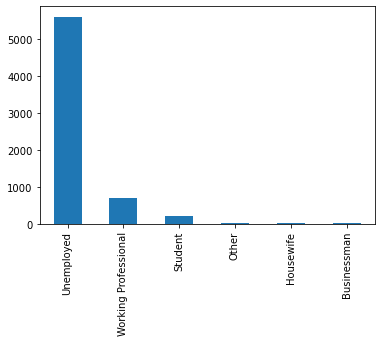

In [24]:
print(round(leads['What is your current occupation'].value_counts()/leads.shape[0]*100,2))
leads['What is your current occupation'].value_counts().plot.bar()
plt.show()
# majority of leads are unemployed

Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64


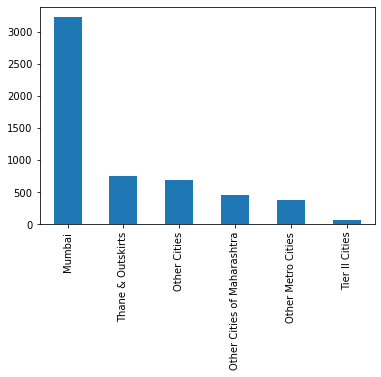

In [25]:
print(round(leads['City'].value_counts()/leads.shape[0]*100,2))
leads['City'].value_counts().plot.bar()
plt.show()

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Form Submitted on Website        0.01
View in browser link Clicked     0.01
Resubscribed to emails           0.01
Approached upfront               0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64


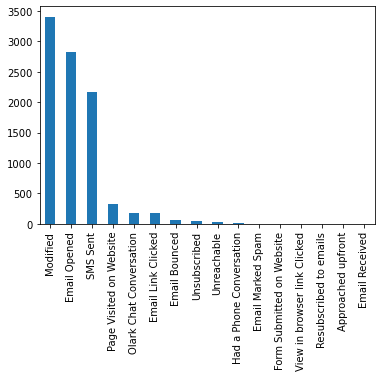

In [26]:
print(round(leads['Last Notable Activity'].value_counts()/leads.shape[0]*100,2))
leads['Last Notable Activity'].value_counts().plot.bar()
plt.show()

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64


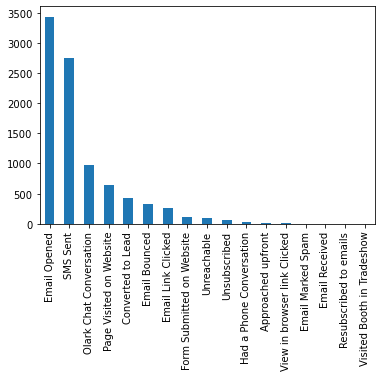

In [27]:
print(round(leads['Last Activity'].value_counts()/leads.shape[0]*100,2))
leads['Last Activity'].value_counts().plot.bar()
plt.show()

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64


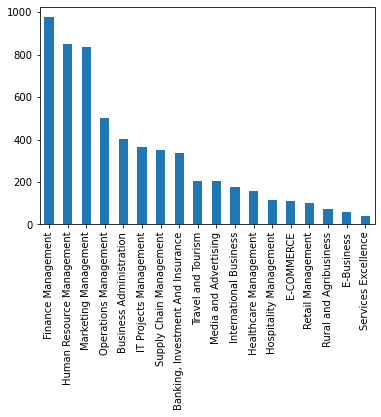

In [28]:
print(round(leads['Specialization'].value_counts()/leads.shape[0]*100,2))
leads['Specialization'].value_counts().plot.bar()
plt.show()

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
testone               0.01
youtubechannel        0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
blog                  0.01
NC_EDM                0.01
WeLearn               0.01
Name: Lead Source, dtype: float64


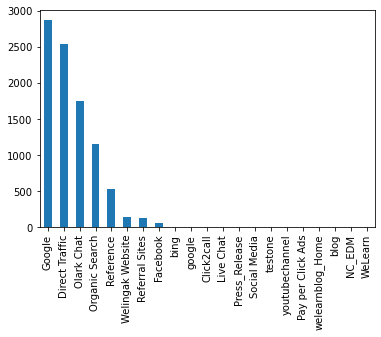

In [29]:
print(round(leads['Lead Source'].value_counts()/leads.shape[0]*100,2))
leads['Lead Source'].value_counts().plot.bar()
plt.show()

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Germany                  0.04
Nigeria                  0.04
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Sweden                   0.03
Asia/Pacific Region      0.02
Netherlands              0.02
Philippines              0.02
China                    0.02
Italy                    0.02
Belgium                  0.02
Ghana                    0.02
Bangladesh               0.02
Uganda                   0.02
Kenya                    0.01
Indonesia                0.01
Sri Lanka                0.01
Tanzania                 0.01
Liberia                  0.01
Russia    

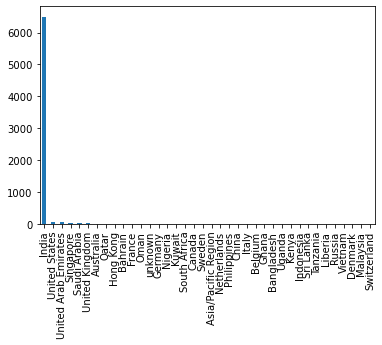

In [30]:
print(round(leads['Country'].value_counts()/leads.shape[0]*100,2))
leads['Country'].value_counts().plot.bar()
plt.show()

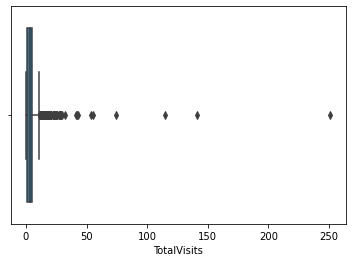

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [31]:
sns.boxplot(leads['TotalVisits'])
plt.show()
#capping required
leads['TotalVisits'].describe()

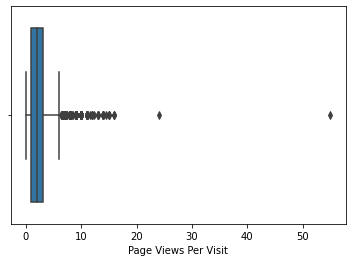

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [32]:
sns.boxplot(leads['Page Views Per Visit'])
plt.show()
leads['Page Views Per Visit'].describe()

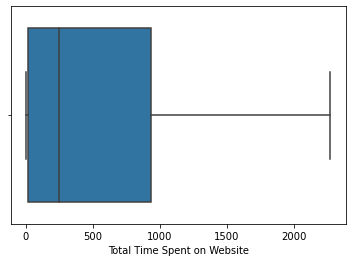

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [33]:
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()
leads['Total Time Spent on Website'].describe()

In [34]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
# dropping those columns which are highly skewed
leads = leads.drop(['Do Not Call', 'What matters most to you in choosing a course',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque','Prospect ID'],axis=1)

In [36]:
# combining categories(which are of less percentage) and naming it as others 

print(round(leads['Lead Origin'].value_counts()/leads.shape[0]*100,2))
leads["Lead Origin"].replace({"Lead Add Form": "Others", "Lead Import": "Others","Quick Add Form":"Others"}, inplace=True)
print(round(leads['Lead Origin'].value_counts()/leads.shape[0]*100,2))

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
Landing Page Submission    52.88
API                        38.74
Others                      8.38
Name: Lead Origin, dtype: float64


In [37]:
print(round(leads['Lead Source'].value_counts()/leads.shape[0]*100,2))
leads['Lead Source'].replace({"Reference": "Others", "Welingak Website":"Others","Referral Sites":"Others","Facebook":"Others",
                              "bing":"Others","google":"Others","Click2call":"Others","Press_Release":"Others",
                              "Live Chat":"Others","Social Media":"Others","NC_EDM":"Others" ,"testone":"Others",
                              "WeLearn":"Others","welearnblog_Home":"Others","blog":"Others", "youtubechannel":"Others",
                              "Pay per Click Ads":"Others"}, inplace=True)
print(round(leads['Lead Source'].value_counts()/leads.shape[0]*100,2))

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
testone               0.01
youtubechannel        0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
blog                  0.01
NC_EDM                0.01
WeLearn               0.01
Name: Lead Source, dtype: float64
Google            31.04
Direct Traffic    27.52
Olark Chat        18.99
Organic Search    12.49
Others             9.57
Name: Lead Source, dtype: float64


In [38]:
print(round(leads['Last Activity'].value_counts()/leads.shape[0]*100,2))
leads['Last Activity'].replace({"Page Visited on Website":"Others","Converted to Lead":"Others","Email Bounced":"Others",
                                "Email Link Clicked":"Others","Form Submitted on Website":"Others","Unreachable":"Others",
                                "Unsubscribed":"Others","Had a Phone Conversation":"Others","Approached upfront":"Others",
                                "View in browser link Clicked":"Others","Email Marked Spam":"Others","Email Received":"Others",
                                "Resubscribed to emails":"Others","Visited Booth in Tradeshow":"Others"},inplace=True)
print(round(leads['Last Activity'].value_counts()/leads.shape[0]*100,2))

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64
Email Opened               37.20
SMS Sent                   29.71
Others                     21.45
Olark Chat Conversation    10.53
Name: Last Activity, dtype: float64


In [39]:
print(round(leads['Country'].value_counts()/leads.shape[0]*100,2))
leads['Country'].replace({"Bahrain":"Others","Hong Kong":"Others","Oman":"Others","France":"Others","unknown":"Others",
                          "Nigeria":"Others","Germany":"Others","Canada":"Others","South Africa":"Others","Kuwait":"Others",
                          "Sweden":"Others","Uganda":"Others","China":"Others","Belgium":"Others","Philippines":"Others",
                          "Asia/Pacific Region":"Others","Netherlands":"Others","Ghana":"Others","Italy":"Others",
                          "Bangladesh":"Others","Malaysia":"Others","Switzerland":"Others","Tanzania":"Others",
                          "Denmark":"Others","Russia":"Others","Sri Lanka":"Others","Kenya":"Others","Liberia":"Others",
                          "Vietnam":"Others","Indonesia":"Others","United States":"Others","United Arab Emirates":"Others",
                          "Singapore":"Others","Saudi Arabia":"Others","United Kingdom":"Others","Australia":"Others",
                          "Qatar":"Others"},inplace=True)
print(round(leads['Country'].value_counts()/leads.shape[0]*100,2))

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Germany                  0.04
Nigeria                  0.04
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Sweden                   0.03
Asia/Pacific Region      0.02
Netherlands              0.02
Philippines              0.02
China                    0.02
Italy                    0.02
Belgium                  0.02
Ghana                    0.02
Bangladesh               0.02
Uganda                   0.02
Kenya                    0.01
Indonesia                0.01
Sri Lanka                0.01
Tanzania                 0.01
Liberia                  0.01
Russia    

In [40]:
print(round(leads['Specialization'].value_counts()/leads.shape[0]*100,2))
leads['Specialization'].replace({"Business Administration":"Others","IT Projects Management":"Others",
                                 "Supply Chain Management":"Others","Banking, Investment And Insurance":"Others",
                                 "Travel and Tourism":"Others","Media and Advertising":"Others",
                                 "International Business":"Others","Healthcare Management":"Others",
                                 "Hospitality Management":"Others","E-COMMERCE":"Others","Retail Management":"Others",
                                 "Rural and Agribusiness":"Others","E-Business":"Others",
                                 "Services Excellence":"Others"},inplace=True)
print(round(leads['Specialization'].value_counts()/leads.shape[0]*100,2))

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64
Others                       29.17
Finance Management           10.56
Human Resource Management     9.18
Marketing Management          9.07
Operations Management         5.44
Name: Speciali

In [41]:
print(round(leads['What is your current occupation'].value_counts()/leads.shape[0]*100,2))
leads['What is your current occupation'].replace({'Student':  'Others','Other':'Others',
                                                  'Housewife':'Others','Businessman':'Others'}, inplace=True)
print(round(leads['What is your current occupation'].value_counts()/leads.shape[0]*100,2))

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64
Unemployed              60.61
Working Professional     7.64
Others                   2.64
Name: What is your current occupation, dtype: float64


In [42]:
print(round(leads['City'].value_counts()/leads.shape[0]*100,2))
leads['City'].replace({'Other Cities':'Others','Other Cities of Maharashtra':'Others',
                      'Other Metro Cities':'Others','Tier II Cities':'Others'},inplace=True)
print(round(leads['City'].value_counts()/leads.shape[0]*100,2))

Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64
Mumbai               34.87
Others               17.28
Thane & Outskirts     8.14
Name: City, dtype: float64


In [43]:
print(round(leads['Last Notable Activity'].value_counts()/leads.shape[0]*100,2))
leads['Last Notable Activity'].replace({"Olark Chat Conversation":"Others","Email Link Clicked":"Others",
                                        "Email Bounced":"Others","Unsubscribed":"Others","Unreachable":"Others",
                                        "Had a Phone Conversation":"Others","Email Marked Spam":"Others",
                                        "Email Received":"Others","View in browser link Clicked":"Others",
                                        "Resubscribed to emails":"Others","Approached upfront":"Others","Form Submitted on Website":"Others",
                                        "Page Visited on Website":"Others"},inplace=True)
print(round(leads['Last Notable Activity'].value_counts()/leads.shape[0]*100,2))

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Form Submitted on Website        0.01
View in browser link Clicked     0.01
Resubscribed to emails           0.01
Approached upfront               0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64
Modified        36.87
Email Opened    30.60
SMS Sent        23.51
Others           9.03
Name: Last Notable Activity, dtype: float64


In [44]:
# soft range cappping the outliers ie from 5 to 
num_vars=[ 'TotalVisits','Page Views Per Visit']

for i in num_vars:
    q1=leads[i].quantile(0.05)
    q4=leads[i].quantile(0.95)
    
    leads[i][leads[i]<=q1]=q1
    leads[i][leads[i]>=q4]=q4

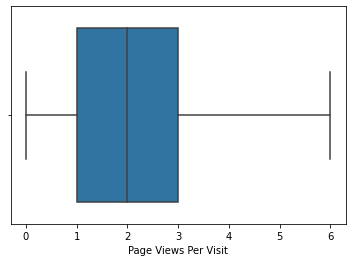

In [45]:
sns.boxplot(leads[ 'Page Views Per Visit'])
plt.show()

Text(0.5, 1.0, 'TotalVisits')

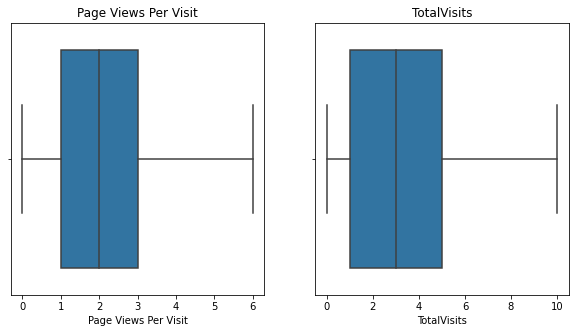

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(leads[ 'Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.subplot(1,2,2)
sns.boxplot(leads[ 'TotalVisits'])
plt.title('TotalVisits')


In [47]:
# again checking the null counts
# null values percentage check
round((leads.isnull().sum()/leads.shape[0])*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [48]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.181918,487.698268,2.258944
std,23405.995698,0.486714,2.781834,548.021466,1.792536
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


In [49]:
# imputing with median in numerical columns also as there is not much difference between mean and median now 

cols=['TotalVisits','Page Views Per Visit']
for i in cols:
    leads[i][leads[i].isnull()]=leads[i].median()
    
# imputing null values with mode values in categorical columns with small null percentage 
cols=['Country','What is your current occupation','City','Specialization']
leads[cols]=leads[cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [50]:
round((leads.isnull().sum()/leads.shape[0])*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [51]:
# as Lead source and Last activity is under 1.5% we can drop these rows
leads=leads.dropna()
round((leads.isnull().sum()/leads.shape[0])*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [52]:
#checking percentage of rows retained
print(f"Percentage of row retained: {(leads.shape[0]/9240)*100}")

Percentage of row retained: 98.51731601731602


## Bivariate analysis

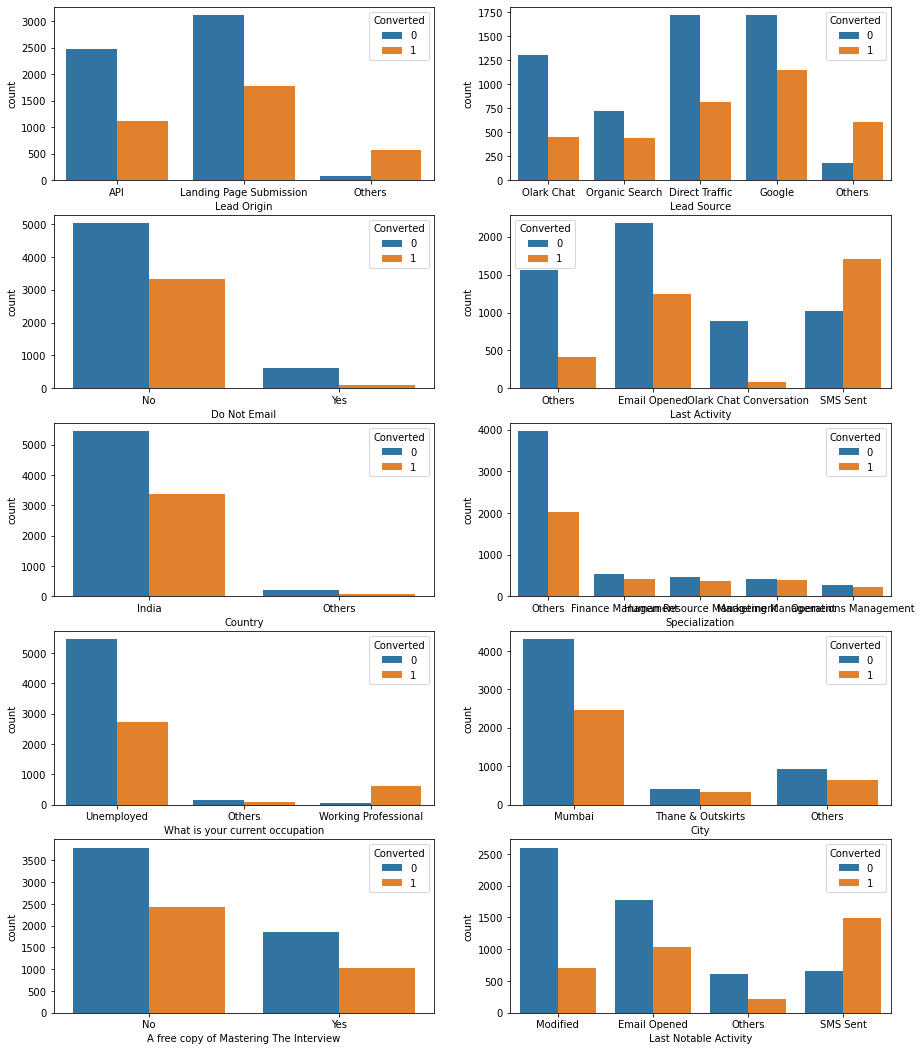

In [53]:
cols=[ 'Lead Origin', 'Lead Source', 'Do Not Email',        
        'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

plt.figure(figsize=(15,30))
for i in enumerate(cols):
    plt.subplot(8,2, i[0]+1)
    sns.countplot(x=leads[i[1]],hue=leads['Converted'])

In [54]:
# drop last notable activity
leads=leads.drop(['Last Notable Activity'],axis=1)

In [55]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Others,India,Others,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Others,Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Others,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,India,Others,Unemployed,Mumbai,No


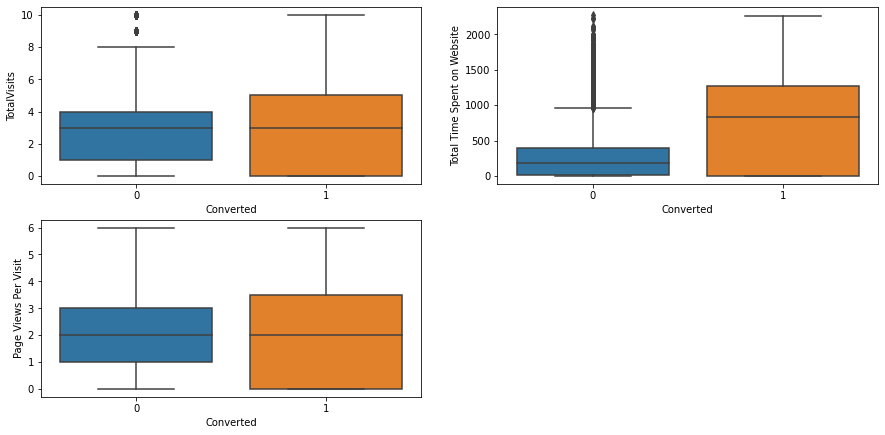

In [56]:
cols=['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(15,15))
for i in enumerate(cols):
    plt.subplot(4,2, i[0]+1)
    sns.boxplot(y=leads[i[1]],x=leads['Converted'])

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Country                                 9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [58]:
#mapping lead number to index to assign score to a lead later
leads.index=leads['Lead Number']
leads.drop(['Lead Number'],axis=1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.00,Others,India,Others,Unemployed,Mumbai,No
660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,Mumbai,No
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,Others,Others,Mumbai,Yes
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,India,Others,Unemployed,Mumbai,No
660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Others,India,Others,Unemployed,Mumbai,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Others,Others,Unemployed,Mumbai,No
579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,Others,Unemployed,Mumbai,Yes
579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,Others,Unemployed,Mumbai,Yes


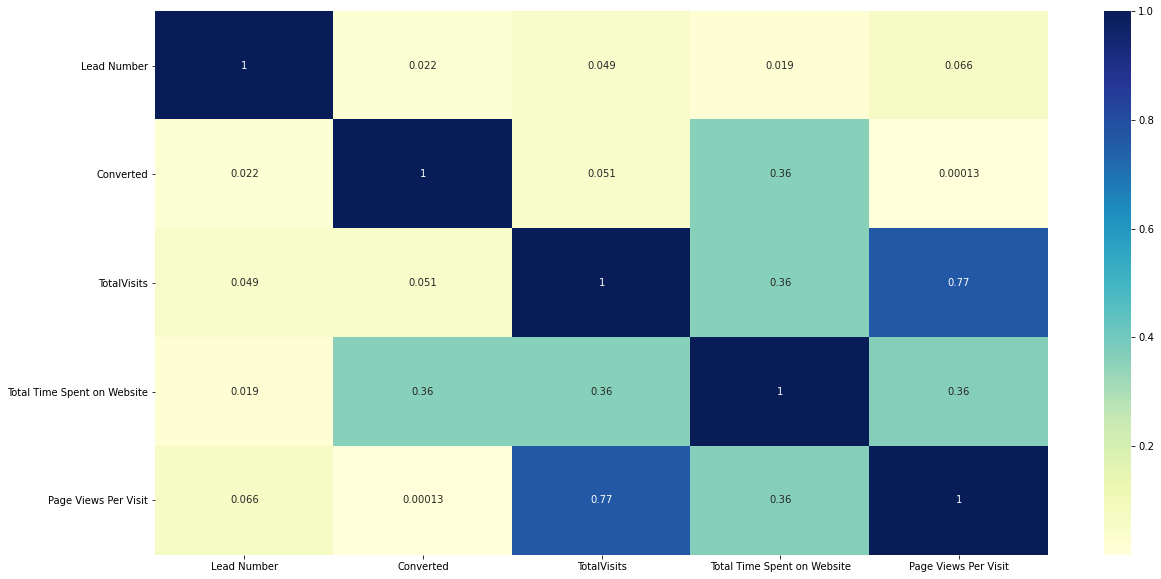

In [59]:
# Correlation
plt.figure(figsize = (20,10))        
sns.heatmap(leads.corr(),annot = True,cmap='YlGnBu')
plt.show()

## Dummy variable creation

In [60]:
leads['Do Not Email']=leads['Do Not Email'].replace(to_replace=['No', 'Yes'], value=[0, 1])
leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].replace(to_replace=['No', 'Yes'], value=[0, 1])

In [61]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')

# Dropping Lead Origin_Landing Page Submission
# lo1 = lo.drop(['Lead Origin_Landing Page Submission'], 1)
lo1 = lo.drop(['Lead Origin_Others'], 1)

#Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

In [62]:
# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Others
ls1 = ls.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ls1], axis=1)

In [63]:
# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Olark Chat Conversation
la1 = la.drop(['Last Activity_Olark Chat Conversation'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,la1], axis=1)

In [64]:
# Creating dummy variables for the variable 'Country'
c = pd.get_dummies(leads['Country'], prefix='Country')
# Dropping Country_Others
c1 = c.drop(['Country_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,c1], axis=1)

In [65]:
# Creating dummy variables for the variable 'What is your current occupation'
co = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping What is your current occupation_Others
co1 = co.drop(['What is your current occupation_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,co1], axis=1)

In [66]:
# Creating dummy variables for the variable 'City'
ci = pd.get_dummies(leads['City'], prefix='City')
# Dropping City_missing
ci1 = ci.drop(['City_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ci1], axis=1)

In [67]:
# Creating dummy variables for the variable Specialization
sp = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping Specialization_missing
sp1 = sp.drop(['Specialization_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,sp1], axis=1)

In [68]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Country_India,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,India,Others,Unemployed,Mumbai,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0
660728,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Mumbai,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0
660727,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Others,Others,Mumbai,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
660719,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Others,Unemployed,Mumbai,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0
660681,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,India,Others,Unemployed,Mumbai,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0


In [69]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization', 
                    'What is your current occupation', 'City'], 1)

In [70]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 660737 to 579533
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9103 non-null   int64  
 1   Do Not Email                                          9103 non-null   int64  
 2   Converted                                             9103 non-null   int64  
 3   TotalVisits                                           9103 non-null   float64
 4   Total Time Spent on Website                           9103 non-null   int64  
 5   Page Views Per Visit                                  9103 non-null   float64
 6   A free copy of Mastering The Interview                9103 non-null   int64  
 7   Lead Origin_API                                       9103 non-null   uint8  
 8   Lead Origin_Landing Page Submission                

In [71]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Country_India,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0
660727,0,2.0,1532,2.0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0
660681,0,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0


In [72]:
# Putting response variable to y
y = leads['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Country_India,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
588783,0,10.0,1851,2.5,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0
607548,1,7.0,30,6.0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0
640717,0,3.0,1490,3.0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0
643976,0,4.0,1205,2.0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0
580141,0,0.0,0,0.0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0


In [75]:
#Saling

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Country_India,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
588783,0,2.444076,2.486792,0.132767,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0
607548,1,1.368845,-0.836090,2.075837,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0
640717,0,-0.064797,1.828055,0.410348,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0
643976,0,0.293613,1.307999,-0.144815,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0
580141,0,-1.140029,-0.890832,-1.255140,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0


In [76]:
### Checking the Converted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted
# the data is imbalanced

37.92156431945513

In [77]:
sum(leads['Converted'])

3452

In [78]:
# Logistic regression model
    
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.0
Date:                Tue, 18 May 2021   Deviance:                       5485.9
Time:                        19:27:31   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0419      0.373      2.791      0.005       0.310       1.774
Do Not Email                                            -0.9283      0.163     -5.705      0.000      -1.247      -0.609
TotalVisits                                              0.3779      0.053      7.127      0.000       0.274       0.482
Total Time Spent on Website                              1.0939      0.040     27.538      0.000       1.016       1.172
Page Views Per Visit                                    -0.2743      0.061     -4.511      0.000      -0.394      -0.155
A free copy of Mastering The Interview                  -0.0186      0.104     -0.179      0.858      -0.222       0.185
Lead Origin_API                                         -3.5974      0.356    -10.105      0.000      -4.295      -2.900
Lead Origin_Landing Page Submission                     -3.9383      0.369    -10.660      0.000      -4.662      -3.214
Lead Source_Direct Traffic                              -0.0715      0.321     -0.222      0.824      -0.701       0.558
Lead Source_Google                                       0.2190      0.311      0.704      0.481      -0.390       0.828
Lead Source_Olark Chat                                   1.2680      0.328      3.860      0.000       0.624       1.912
Lead Source_Organic Search                               0.1918      0.319      0.601      0.548      -0.434       0.817
Last Activity_Email Opened                               1.5926      0.164      9.698      0.000       1.271       1.915
Last Activity_Others                                     0.9874      0.180      5.498      0.000       0.635       1.339
Last Activity_SMS Sent                                   2.7886      0.169     16.520      0.000       2.458       3.119
Country_India                                            0.4072      0.209      1.947      0.051      -0.003       0.817
What is your current occupation_Unemployed              -0.5777      0.199     -2.901      0.004      -0.968      -0.187
What is your current occupation_Working Professional     2.1425      0.268      7.990      0.000       1.617       2.668
City_Mumbai                                             -0.2246      0.096     -2.349      0.019      -0.412      -0.037
City_Thane & Outskirts                                  -0.0285      0.139     -0.205      0.838      -0.301       0.244
Specialization_Finance Management                        0.3986      0.116      3.434      0.001       0.171       0.626
Specialization_Human Resource Management                 0.1718      0.119      1.441      0.150      -0.062       0.405
Specialization_Marketing Management                      0

## Feature selection using RFE

In [79]:
logreg = LogisticRegression()

In [80]:
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_India', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Mumbai', True, 1),
 ('City_Thane & Outskirts', False, 4),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1)]

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'City_Thane & Outskirts',
       'Specialization_Human Resource Management'],
      dtype='object')

## Building Second Model

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.0
Date:                Tue, 18 May 2021   Deviance:                       5488.0
Time:                        19:27:33   Pearson chi2:                 7.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0577      0.370      2.855      0.004       0.332       1.784
Do Not Email                                            -0.9322      0.162     -5.742      0.000      -1.250      -0.614
TotalVisits                                              0.3782      0.053      7.184      0.000       0.275       0.481
Total Time Spent on Website                              1.0956      0.040     27.590      0.000       1.018       1.173
Page Views Per Visit                                    -0.2717      0.061     -4.477      0.000      -0.391      -0.153
Lead Origin_API                                         -3.6234      0.356    -10.184      0.000      -4.321      -2.926
Lead Origin_Landing Page Submission                     -3.9407      0.369    -10.689      0.000      -4.663      -3.218
Lead Source_Direct Traffic                              -0.0765      0.318     -0.241      0.810      -0.700       0.547
Lead Source_Google                                       0.2304      0.311      0.741      0.458      -0.379       0.840
Lead Source_Olark Chat                                   1.2787      0.329      3.892      0.000       0.635       1.923
Lead Source_Organic Search                               0.1872      0.318      0.589      0.556      -0.436       0.811
Last Activity_Email Opened                               1.5991      0.164      9.751      0.000       1.278       1.921
Last Activity_Others                                     0.9934      0.179      5.538      0.000       0.642       1.345
Last Activity_SMS Sent                                   2.7920      0.169     16.557      0.000       2.461       3.123
Country_India                                            0.4018      0.209      1.924      0.054      -0.008       0.811
What is your current occupation_Unemployed              -0.5760      0.199     -2.897      0.004      -0.966      -0.186
What is your current occupation_Working Professional     2.1558      0.268      8.049      0.000       1.631       2.681
City_Mumbai                                             -0.2141      0.082     -2.615      0.009      -0.375      -0.054
Specialization_Finance Management                        0.3610      0.113      3.193      0.001       0.139       0.583
Specialization_Marketing Management                      0.3653      0.120      3.040      0.002       0.130       0.601
Specialization_Operations Management                     0.1957      0.158      1.243      0.214      -0.113       0.505
========================================================================================================================
"""

###### Lead Source_Direct Traffic has high p-value.
###### Drop Lead Source_Direct Traffic

In [86]:
col = col.drop('Lead Source_Direct Traffic', 1)

## Third model

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.0
Date:                Tue, 18 May 2021   Deviance:                       5488.1
Time:                        19:27:33   Pearson chi2:                 7.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0602      0.370      2.863      0.004       0.334       1.786
Do Not Email                                            -0.9327      0.162     -5.745      0.000      -1.251      -0.614
TotalVisits                                              0.3786      0.053      7.197      0.000       0.276       0.482
Total Time Spent on Website                              1.0952      0.040     27.603      0.000       1.017       1.173
Page Views Per Visit                                    -0.2706      0.061     -4.472      0.000      -0.389      -0.152
Lead Origin_API                                         -3.6934      0.205    -18.009      0.000      -4.095      -3.291
Lead Origin_Landing Page Submission                     -4.0158      0.197    -20.435      0.000      -4.401      -3.631
Lead Source_Google                                       0.3019      0.093      3.258      0.001       0.120       0.483
Lead Source_Olark Chat                                   1.3488      0.152      8.847      0.000       1.050       1.648
Lead Source_Organic Search                               0.2579      0.122      2.108      0.035       0.018       0.498
Last Activity_Email Opened                               1.5983      0.164      9.748      0.000       1.277       1.920
Last Activity_Others                                     0.9935      0.179      5.539      0.000       0.642       1.345
Last Activity_SMS Sent                                   2.7905      0.168     16.561      0.000       2.460       3.121
Country_India                                            0.4007      0.209      1.919      0.055      -0.009       0.810
What is your current occupation_Unemployed              -0.5752      0.199     -2.894      0.004      -0.965      -0.186
What is your current occupation_Working Professional     2.1566      0.268      8.054      0.000       1.632       2.681
City_Mumbai                                             -0.2141      0.082     -2.615      0.009      -0.375      -0.054
Specialization_Finance Management                        0.3606      0.113      3.191      0.001       0.139       0.582
Specialization_Marketing Management                      0.3651      0.120      3.039      0.002       0.130       0.601
Specialization_Operations Management                     0.1958      0.158      1.243      0.214      -0.113       0.505
========================================================================================================================
"""

#### Specialization_Operations Management has high p value, drop it

In [88]:
col = col.drop('Specialization_Operations Management', 1)

#### Building fourth model

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.8
Date:                Tue, 18 May 2021   Deviance:                       5489.6
Time:                        19:27:34   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0806      0.370      2.922      0.003       0.356       1.805
Do Not Email                                            -0.9336      0.162     -5.751      0.000      -1.252      -0.615
TotalVisits                                              0.3793      0.053      7.210      0.000       0.276       0.482
Total Time Spent on Website                              1.0961      0.040     27.636      0.000       1.018       1.174
Page Views Per Visit                                    -0.2713      0.060     -4.486      0.000      -0.390      -0.153
Lead Origin_API                                         -3.6977      0.205    -18.031      0.000      -4.100      -3.296
Lead Origin_Landing Page Submission                     -4.0083      0.196    -20.410      0.000      -4.393      -3.623
Lead Source_Google                                       0.3039      0.093      3.280      0.001       0.122       0.485
Lead Source_Olark Chat                                   1.3504      0.152      8.860      0.000       1.052       1.649
Lead Source_Organic Search                               0.2586      0.122      2.114      0.035       0.019       0.498
Last Activity_Email Opened                               1.5995      0.164      9.760      0.000       1.278       1.921
Last Activity_Others                                     0.9934      0.179      5.540      0.000       0.642       1.345
Last Activity_SMS Sent                                   2.7921      0.168     16.577      0.000       2.462       3.122
Country_India                                            0.3913      0.208      1.878      0.060      -0.017       0.800
What is your current occupation_Unemployed              -0.5715      0.199     -2.875      0.004      -0.961      -0.182
What is your current occupation_Working Professional     2.1702      0.267      8.115      0.000       1.646       2.694
City_Mumbai                                             -0.2230      0.082     -2.735      0.006      -0.383      -0.063
Specialization_Finance Management                        0.3430      0.112      3.059      0.002       0.123       0.563
Specialization_Marketing Management                      0.3484      0.119      2.918      0.004       0.114       0.582
========================================================================================================================
"""

In [90]:
# Country_India has higher p value than 0.05 so drop this.

col = col.drop('Country_India', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.6
Date:                Tue, 18 May 2021   Deviance:                       5493.3
Time:                        19:27:34   Pearson chi2:                 7.06e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4702      0.306      4.797      0.000       0.869       2.071
Do Not Email                                            -0.9361      0.162     -5.770      0.000      -1.254      -0.618
TotalVisits                                              0.3795      0.053      7.218      0.000       0.276       0.483
Total Time Spent on Website                              1.0942      0.040     27.626      0.000       1.017       1.172
Page Views Per Visit                                    -0.2717      0.060     -4.494      0.000      -0.390      -0.153
Lead Origin_API                                         -3.7198      0.205    -18.162      0.000      -4.121      -3.318
Lead Origin_Landing Page Submission                     -4.0273      0.196    -20.530      0.000      -4.412      -3.643
Lead Source_Google                                       0.3234      0.092      3.512      0.000       0.143       0.504
Lead Source_Olark Chat                                   1.3700      0.152      9.006      0.000       1.072       1.668
Lead Source_Organic Search                               0.2663      0.122      2.177      0.029       0.027       0.506
Last Activity_Email Opened                               1.5980      0.164      9.758      0.000       1.277       1.919
Last Activity_Others                                     0.9902      0.179      5.526      0.000       0.639       1.341
Last Activity_SMS Sent                                   2.7918      0.168     16.588      0.000       2.462       3.122
What is your current occupation_Unemployed              -0.5784      0.199     -2.908      0.004      -0.968      -0.189
What is your current occupation_Working Professional     2.1574      0.267      8.066      0.000       1.633       2.682
City_Mumbai                                             -0.2149      0.081     -2.642      0.008      -0.374      -0.055
Specialization_Finance Management                        0.3492      0.112      3.116      0.002       0.130       0.569
Specialization_Marketing Management                      0.3511      0.119      2.944      0.003       0.117       0.585
========================================================================================================================
"""

#### Now checking vif values.

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,17.67
5,Lead Origin_Landing Page Submission,9.92
4,Lead Origin_API,9.13
9,Last Activity_Email Opened,4.50
14,City_Mumbai,4.24
11,Last Activity_SMS Sent,4.04
7,Lead Source_Olark Chat,3.85
10,Last Activity_Others,3.37
3,Page Views Per Visit,3.32
1,TotalVisits,2.62


In [92]:
# What is your current occupation_Unemployed has high vif, so drop this.
col = col.drop('What is your current occupation_Unemployed', 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.8
Date:                Tue, 18 May 2021   Deviance:                       5501.5
Time:                        19:27:35   Pearson chi2:                 7.06e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9316      0.243      3.831      0.000       0.455       1.408
Do Not Email                                            -0.9344      0.162     -5.757      0.000      -1.253      -0.616
TotalVisits                                              0.3817      0.053      7.266      0.000       0.279       0.485
Total Time Spent on Website                              1.0956      0.040     27.669      0.000       1.018       1.173
Page Views Per Visit                                    -0.2731      0.060     -4.524      0.000      -0.391      -0.155
Lead Origin_API                                         -3.7257      0.205    -18.203      0.000      -4.127      -3.325
Lead Origin_Landing Page Submission                     -4.0335      0.196    -20.571      0.000      -4.418      -3.649
Lead Source_Google                                       0.3144      0.092      3.421      0.001       0.134       0.495
Lead Source_Olark Chat                                   1.3682      0.152      9.001      0.000       1.070       1.666
Lead Source_Organic Search                               0.2591      0.122      2.122      0.034       0.020       0.498
Last Activity_Email Opened                               1.5884      0.163      9.730      0.000       1.268       1.908
Last Activity_Others                                     0.9751      0.179      5.458      0.000       0.625       1.325
Last Activity_SMS Sent                                   2.7655      0.167     16.511      0.000       2.437       3.094
What is your current occupation_Working Professional     2.7180      0.186     14.617      0.000       2.354       3.082
City_Mumbai                                             -0.2117      0.081     -2.603      0.009      -0.371      -0.052
Specialization_Finance Management                        0.3529      0.112      3.156      0.002       0.134       0.572
Specialization_Marketing Management                      0.3542      0.119      2.973      0.003       0.121       0.588
========================================================================================================================
"""

In [93]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_API,7.08
5,Lead Origin_Landing Page Submission,6.78
13,City_Mumbai,3.99
7,Lead Source_Olark Chat,3.85
9,Last Activity_Email Opened,3.56
3,Page Views Per Visit,3.26
11,Last Activity_SMS Sent,3.09
10,Last Activity_Others,2.89
1,TotalVisits,2.62
6,Lead Source_Google,2.44


In [94]:
# Lead Origin_API Submission has high vif, so drop this.
col = col.drop('Lead Origin_API', 1)
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.2
Date:                Tue, 18 May 2021   Deviance:                       5922.3
Time:                        19:27:35   Pearson chi2:                 6.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5689      0.184     -8.548      0.000      -1.929      -1.209
Do Not Email                                            -0.9094      0.152     -5.985      0.000      -1.207      -0.612
TotalVisits                                              0.2748      0.051      5.397      0.000       0.175       0.375
Total Time Spent on Website                              0.9557      0.038     25.280      0.000       0.882       1.030
Page Views Per Visit                                    -0.5006      0.059     -8.548      0.000      -0.615      -0.386
Lead Origin_Landing Page Submission                     -1.1336      0.091    -12.511      0.000      -1.311      -0.956
Lead Source_Google                                      -0.3430      0.083     -4.142      0.000      -0.505      -0.181
Lead Source_Olark Chat                                  -0.4128      0.113     -3.651      0.000      -0.634      -0.191
Lead Source_Organic Search                              -0.2816      0.117     -2.415      0.016      -0.510      -0.053
Last Activity_Email Opened                               1.7654      0.160     11.036      0.000       1.452       2.079
Last Activity_Others                                     1.0051      0.174      5.781      0.000       0.664       1.346
Last Activity_SMS Sent                                   2.9799      0.164     18.144      0.000       2.658       3.302
What is your current occupation_Working Professional     2.8227      0.180     15.701      0.000       2.470       3.175
City_Mumbai                                             -0.2910      0.078     -3.736      0.000      -0.444      -0.138
Specialization_Finance Management                        0.4834      0.106      4.540      0.000       0.275       0.692
Specialization_Marketing Management                      0.4017      0.114      3.529      0.000       0.179       0.625
========================================================================================================================
"""

In [95]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,City_Mumbai,3.55
4,Lead Origin_Landing Page Submission,3.45
3,Page Views Per Visit,3.25
8,Last Activity_Email Opened,2.89
10,Last Activity_SMS Sent,2.67
1,TotalVisits,2.61
9,Last Activity_Others,2.43
6,Lead Source_Olark Chat,1.99
5,Lead Source_Google,1.93
7,Lead Source_Organic Search,1.49


all p values are under 5% and Vif is less than 5

### Model evaluation

In [96]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
588783    0.996954
607548    0.020300
640717    0.815772
643976    0.458097
580141    0.260431
610971    0.260431
581705    0.514946
657142    0.839980
607556    0.066728
649066    0.253473
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9969536 , 0.02030015, 0.81577167, 0.45809659, 0.26043138,
       0.26043138, 0.51494564, 0.83997961, 0.06672788, 0.25347342])

creating dataframe with actual converted and predicted probabilities

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.996954,588783
1,0,0.020300,607548
2,1,0.815772,640717
3,1,0.458097,643976
4,0,0.260431,580141


In [99]:
y_train_pred_final.shape

(6372, 3)

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.996954,588783,1
1,0,0.020300,607548,0
2,1,0.815772,640717,1
3,1,0.458097,643976,0
4,0,0.260431,580141,0


In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3386  535]
 [ 841 1610]]


In [102]:
#overall accuracy.
print(f'Accuracy is: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')

Accuracy is: 0.7840552416823603


In [103]:
# now calculating sensitivity, specificity, false +ve rate, +ve predictive value, -ve predictive value

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
FPR = FP/float(TN+FP) 
PPV = TP/float(TP+FP)
NPV = TN/float(TN+FN)

print(f'sensitivity: {sensitivity}\nspecificity: {specificity}\nfalse +ve rate: {FPR}\n+ve predictive value: {PPV}\n-ve predictive value: {NPV}')

sensitivity: 0.65687474500204
specificity: 0.8635552155062484
false +ve rate: 0.13644478449375158
+ve predictive value: 0.7505827505827506
-ve predictive value: 0.8010409273716584


In [104]:
# roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = True )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score ,lw=2)
    plt.plot([0, 1], [0, 1], 'k--',lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

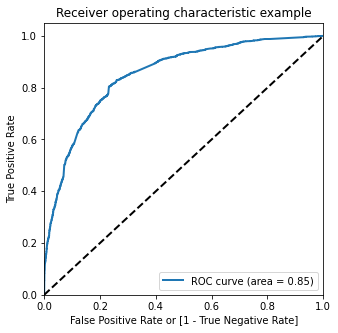

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [106]:
# finding optimal cut-off
num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.996954,588783,1,1,1,1,1,1,1,1,1,1,1
1,0,0.020300,607548,0,1,0,0,0,0,0,0,0,0,0
2,1,0.815772,640717,1,1,1,1,1,1,1,1,1,1,0
3,1,0.458097,643976,0,1,1,1,1,1,0,0,0,0,0
4,0,0.260431,580141,0,1,1,1,0,0,0,0,0,0,0


In [107]:
# Now calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.566855  0.968992  0.315481
0.2   0.2  0.677966  0.922481  0.525121
0.3   0.3  0.765066  0.838433  0.719204
0.4   0.4  0.779818  0.738066  0.805917
0.5   0.5  0.784055  0.656875  0.863555
0.6   0.6  0.768675  0.538964  0.912267
0.7   0.7  0.738387  0.405141  0.946697
0.8   0.8  0.713120  0.299878  0.971436
0.9   0.9  0.678751  0.179927  0.990564


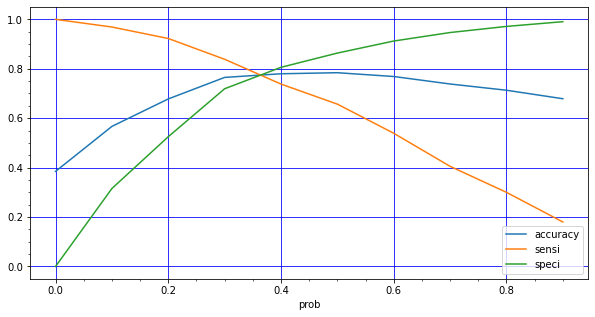

In [108]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.minorticks_on()
plt.grid(b=True, which='major', color='b', linestyle='-')
# plt.grid(b=True, which='minor', color='g', linestyle='-')
plt.show()

In [109]:
## From the above curve, 0.36 is the optimum point to take it as a cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.996954,588783,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.020300,607548,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.815772,640717,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.458097,643976,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.260431,580141,0,1,1,1,0,0,0,0,0,0,0,0


In [110]:
# Assigning Lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100,2))

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.996954,588783,1,1,1,1,1,1,1,1,1,1,1,1,99.70
1,0,0.020300,607548,0,1,0,0,0,0,0,0,0,0,0,0,2.03
2,1,0.815772,640717,1,1,1,1,1,1,1,1,1,1,0,1,81.58
3,1,0.458097,643976,0,1,1,1,1,1,0,0,0,0,0,1,45.81
4,0,0.260431,580141,0,1,1,1,0,0,0,0,0,0,0,0,26.04


In [111]:
# making new confusion matrix for evaluation

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3057,  864],
       [ 574, 1877]], dtype=int64)

In [112]:
# now calculating Accuracy, sensitivity, specificity, false +ve rate, +ve predictive value, -ve predictive value

print(f'Accuracy is: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}')
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
FPR = FP/float(TN+FP) 
PPV = TP/float(TP+FP)
NPV = TN/float(TN+FN)

print(f'sensitivity: {sensitivity}\nspecificity: {specificity}\nfalse +ve rate: {FPR}\n+ve predictive value: {PPV}\n-ve predictive value: {NPV}')

Accuracy is: 0.7743251726302574
sensitivity: 0.7658098735210118
specificity: 0.7796480489671003
false +ve rate: 0.22035195103289976
+ve predictive value: 0.6847865742429771
-ve predictive value: 0.8419168273202975


In [113]:
# Precision and recall

p=precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
r=recall_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

print(f'precision_score: {p}\nrecall_score: {r}')

precision_score: 0.6847865742429771
recall_score: 0.7658098735210118


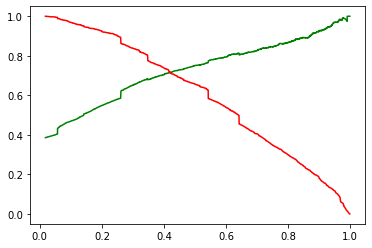

In [114]:
# precision recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [115]:
# making Predictions on test data
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Country_India,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management
Lead Number,,,,,,,,,,,,,,,,,,,,,,,
626970,0,-1.140029,-0.890832,-1.255140,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
621241,0,-1.140029,-0.890832,-1.255140,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
594179,0,-0.781618,-0.617119,-0.699977,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0
647539,0,-1.140029,-0.890832,-1.255140,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0
587204,0,1.368845,-0.826966,-0.477912,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0


In [116]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Working Professional,City_Mumbai,Specialization_Finance Management,Specialization_Marketing Management
Lead Number,,,,,,,,,,,,,,,
626970,0,-1.140029,-0.890832,-1.255140,0,0,0,0,1,0,0,0,1,0,0
621241,0,-1.140029,-0.890832,-1.255140,0,0,1,0,0,0,1,0,0,0,0
594179,0,-0.781618,-0.617119,-0.699977,0,1,0,0,0,1,0,0,1,0,0
647539,0,-1.140029,-0.890832,-1.255140,0,0,1,0,0,1,0,0,1,0,0
587204,0,1.368845,-0.826966,-0.477912,0,1,0,0,0,1,0,0,1,0,0


In [117]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [118]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
Lead Number,
626970,0.347309
621241,0.613461
594179,0.160840
647539,0.141366
587204,0.202158


In [119]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Concatnating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Converted_prob
Lead Number,,
626970,1,0.347309
621241,1,0.613461
594179,0,0.160840
647539,0,0.141366
587204,0,0.202158


In [120]:
# marking 1,0 according to threshold value
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

In [121]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead Number,,,,
626970,1,0.347309,0,35
621241,1,0.613461,1,61
594179,0,0.160840,0,16
647539,0,0.141366,0,14
587204,0,0.202158,0,20


In [122]:
# now check accuracy ... for test data
# making new confusion matrix for evaluation

confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1336,  394],
       [ 228,  773]], dtype=int64)

In [123]:
# now calculating Accuracy, sensitivity, specificity, false +ve rate, +ve predictive value, -ve predictive value

print(f'Accuracy is: {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)}')
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
FPR = FP/float(TN+FP) 
PPV = TP/float(TP+FP)
NPV = TN/float(TN+FN)

print(f'sensitivity: {sensitivity}\nspecificity: {specificity}\nfalse +ve rate: {FPR}\n+ve predictive value: {PPV}\n-ve predictive value: {NPV}')

Accuracy is: 0.7722445990479678
sensitivity: 0.7722277722277723
specificity: 0.7722543352601156
false +ve rate: 0.2277456647398844
+ve predictive value: 0.662382176520994
-ve predictive value: 0.8542199488491049


In [124]:
# Precision and recall

p=precision_score(y_pred_final.Converted,y_pred_final.final_predicted)
r=recall_score(y_pred_final.Converted,y_pred_final.final_predicted)

print(f'precision_score: {p}\nrecall_score: {r}')

precision_score: 0.662382176520994
recall_score: 0.7722277722277723


In [125]:
df1=y_pred_final[['Lead_Score']].reset_index()
df2=y_train_pred_final[['Lead Number','Lead_Score']]
Lead_Score_df=df1.append(df2)

print(Lead_Score_df.shape)
print('Final data frame with lead score')
Lead_Score_df.head()

(9103, 2)
Final data frame with lead score


,Lead Number,Lead_Score
0,626970,35.0
1,621241,61.0
2,594179,16.0
3,647539,14.0
4,587204,20.0


In [126]:
# concatinating the lead score with the Leads data set
# Final_leads_df is the dataframe we provide to sales team
Final_leads_df=pd.merge(leads_backup,Lead_Score_df,on='Lead Number',how='left')
Final_leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,14.00
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,51.51
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,63.37
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,10.00
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,38.74


so our logistic regression equation is:

logit(converted)=

    -1.5689 * const
    -0.9094 *[Do Not Email]
    +0.2748 *[TotalVisits]
    +0.9557 *[Total Time Spent on Website]
    -0.5006 *[Page Views Per Visit]
    -1.1336 *[Lead Origin_Landing Page Submission]
    -0.3430 *[Lead Source_Google]
    -0.4128 *[Lead Source_Olark Chat]
    -0.2816 *[Lead Source_Organic Search]
    +1.7654 *[Last Activity_Email Opened]
    +1.0051 *[Last Activity_Others1]
    +0.9799 *[Last Activity_SMS Sent2]
    +2.8227 *[What is your current occupation_Working Professional]
    -0.2910 *[City_Mumbai]
    +0.4834 *[Specialization_Finance Management]
    +0.4017 *[Specialization_Marketing Management]

top three variables in your model which contribute most towards the probability of a lead getting converted?

    1.Last Activity_SMS Sent
    2.What is your current occupation_Working Professional
    3.Last Activity_Email Opened